In [3]:
!pip install pandas-profiling[notebook] --user

  Using cached pandas_profiling-2.8.0-py2.py3-none-any.whl (259 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached visions-0.4.4-py3-none-any.whl (59 kB)
  Using cached tqdm-4.46.1-py2.py3-none-any.whl (63 kB)
Processing c:\users\jcarr\appdata\local\pip\cache\wheels\0e\67\52\85533272600156b57e3eb4b1c506915dec8e2f3984ec12cb81\confuse-1.2.0-py3-none-any.whl
  Using cached matplotlib-3.2.2-cp37-cp37m-win_amd64.whl (9.2 MB)
  Using cached tangled_up_in_unicode-0.0.6-py3-none-any.whl (3.1 MB)
  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached phik-0.10.0-py3-none-any.whl (599 kB)
Processing c:\users\jcarr\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655\htmlmin-0.1.12-py3-none-any.whl
  Using cached jupyter_client-6.1.3-py3-none-any.whl (106 kB)
  Using cached jupyter_core-4.6.3-py2.py3-none-any.whl (83 kB)
Processing c:\users\jcarr\appdata\local\pip\cache\wheels\16\72\b0\e5be34699908d9ff25dcb3debbb71

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;  sns.set()
import numpy as np
from datetime import datetime as dt
import folium  #needed for interactive map
from folium.plugins import HeatMap
import pandas_profiling

In [5]:
with open('P:/Mi unidad/Personal/PS_Colombia/202001/DS4A/Project/Encicla/Data/inventory.csv', encoding='utf-8') as f:
    df=pd.read_csv(f, delimiter=',')

In [3]:
df.columns

Index(['Date', 'Zone_ID', 'Zone_name', 'Zone_desc', 'Station_ID',
       'Station_order', 'Station_name', 'Station_address',
       'Station_description', 'Station_latitude', 'Station_longitude',
       'Station_type', 'Station_capacity', 'Station_bikes', 'Station_places',
       'Station_picture', 'Station_bikes_state', 'Station_places_state',
       'Station_closed', 'Station_cdo'],
      dtype='object')

In [4]:
df['YYYY'] = df['Date'].str[:4]
df['MM'] = df['Date'].str[5:7]
df['DD'] = df['Date'].str[5:7]
df['TIME'] = df['Date'].str[11:16]
df['datetime'] = pd.to_datetime(df['YYYY'] + '-' + df['MM'] + '-' + df['DD'] + ' ' + df['TIME'], format='%Y-%m-%d %H:%M')
df['HOUR'] = pd.DatetimeIndex(df['datetime']).hour
df.head()

Date  Zone_ID             Zone_name  \
0  2020-06-05T18:44:40-05:00[America/Bogota]      1.0                Zona 1   
1  2020-06-05T18:44:40-05:00[America/Bogota]      1.0                Zona 1   
2  2020-06-05T18:44:40-05:00[America/Bogota]      1.0                Zona 1   
3  2020-06-05T18:44:40-05:00[America/Bogota]      2.0  Zona 2 Noroccidental   
4  2020-06-05T18:44:40-05:00[America/Bogota]      2.0  Zona 2 Noroccidental   

             Zone_desc  Station_ID  Station_order          Station_name  \
0  Comuna 4 - Aranjuez         1.0            0.0               Moravia   
1  Comuna 4 - Aranjuez         2.0            1.0           Universidad   
2  Comuna 4 - Aranjuez         3.0            2.0                Ruta N   
3     Comuna 7 Robledo         4.0            0.0            Punto Cero   
4     Comuna 7 Robledo         5.0            1.0  Universidad Nacional   

       Station_address                                Station_description  \
0    CALLE 82A # 52-29  Frente a la entrada principal del Centro de De...   
1      CALLE 73 # 52-2  Bajo el viaducto de la estacin Universidad del...   
2  CARRERA 52 # 67A-13  Frente a la fachada principal de Ruta N sobre ...   
3   CARRERA 64 # 65-59  Intercambio vial de Punto Cero al lado de la e...   
4   CALLE 59A # 64E-44  Portera de la Iguan con Carrera 65 de la Unive...   

   Station_latitude  ...  Station_bikes_state Station_places_state  \
0          6.276585  ...                    0                    0   
1          6.269267  ...                    0                    0   
2          6.265182  ...                    0                    0   
3          6.265161  ...              warning                    0   
4          6.259663  ...                    0                    0   

   Station_closed  Station_cdo  YYYY  MM  DD   TIME            datetime  HOUR  
0             0.0          0.0  2020  06  06  18:44 2020-06-06 18:44:00  18.0  
1             0.0          0.0  2020  06  06  18:44 2020-06-06 18:44:00  18.0  
2             0.0          0.0  2020  06  06  18:44 2020-06-06 18:44:00  18.0  
3             0.0          0.0  2020  06  06  18:44 2020-06-06 18:44:00  18.0  
4             0.0          0.0  2020  06  06  18:44 2020-06-06 18:44:00  18.0  

[5 rows x 26 columns]

In [5]:
df_by_station = df.groupby('Station_name').agg({'Station_bikes': 'sum', 'Station_ID':'size'}).reset_index()
df_by_station['avg'] = df_by_station['Station_bikes'] / df_by_station['Station_ID']
df_by_station[df_by_station['avg'] == 0]

Station_name  Station_bikes  Station_ID  avg
62         Primavera            0.0         822  0.0
65  Puerta La 77 Sur            0.0         822  0.0
85               UPB            0.0         822  0.0

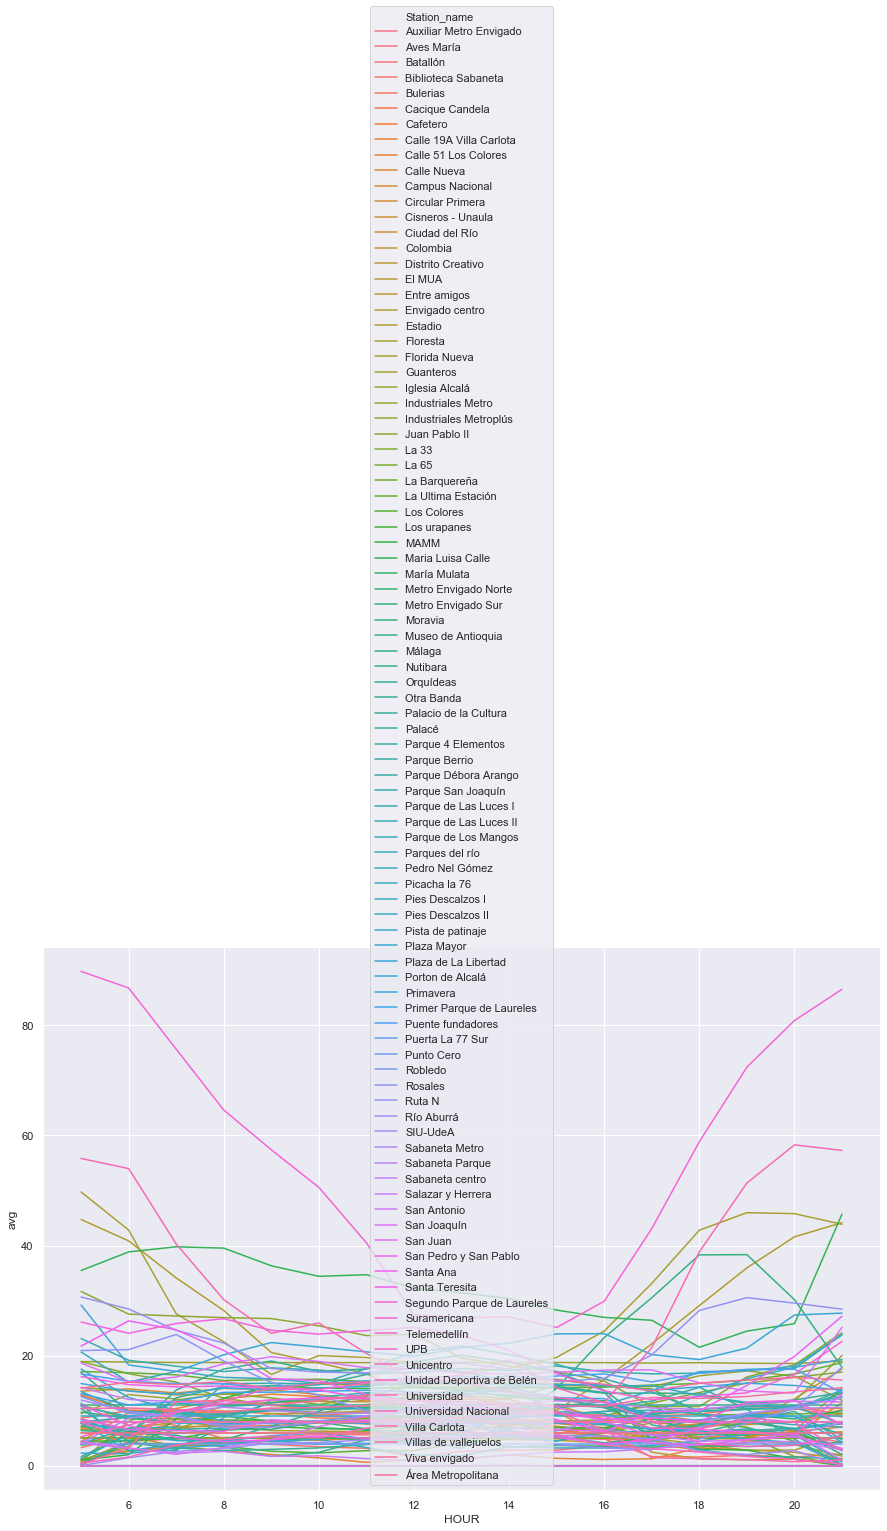

In [6]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
df_by_station_hour = df.groupby(['Station_name', 'HOUR']).agg({'Station_bikes': 'sum', 'Station_ID':'size'}).reset_index()
df_by_station_hour['avg'] = df_by_station_hour['Station_bikes'] / df_by_station_hour['Station_ID']
df_by_station_hour = df_by_station_hour.drop(columns=['Station_bikes', 'Station_ID'])
df_by_station_hour
sns.lineplot('HOUR', 'avg', hue='Station_name', data=df_by_station_hour)

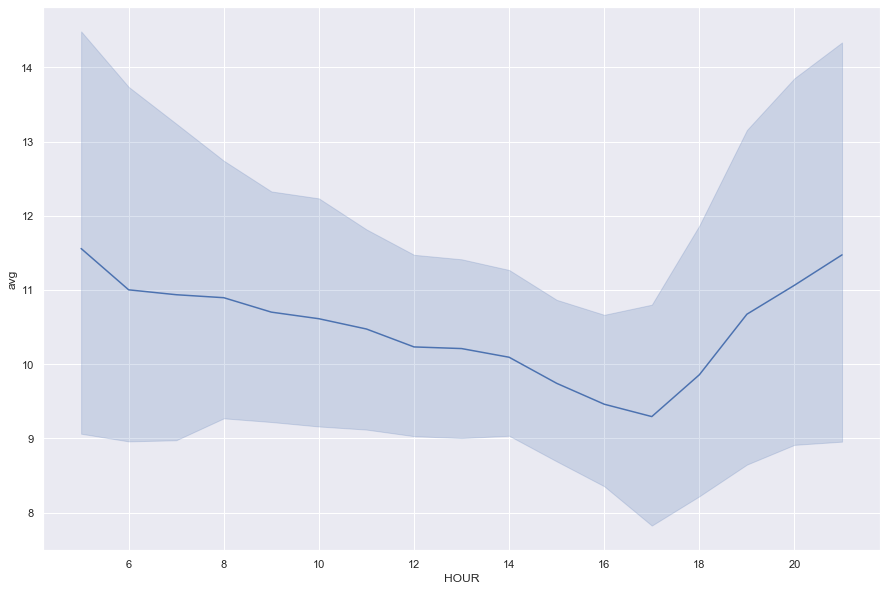

In [7]:
fig = plt.gcf()
fig.set_size_inches(15, 10)
df_by_hour = df.groupby(['HOUR']).agg({'Station_bikes': 'sum', 'Station_ID':'size'}).reset_index()
df_by_hour['avg'] = df_by_hour['Station_bikes'] / df_by_hour['Station_ID']
df_by_hour = df_by_hour.drop(columns=['Station_bikes', 'Station_ID'])
#df_by_hour
sns.lineplot('HOUR', 'avg', data=df_by_station_hour)

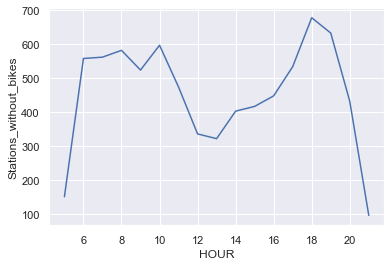

In [8]:
df_temp = df[['HOUR', 'Station_name', 'Station_bikes']][df['Station_bikes'] == 0].groupby('HOUR').agg({'Station_name':'size'}).reset_index()
df_temp.columns = ['HOUR', 'Stations_without_bikes']
df_temp

sns.lineplot('HOUR', 'Stations_without_bikes', data=df_temp)

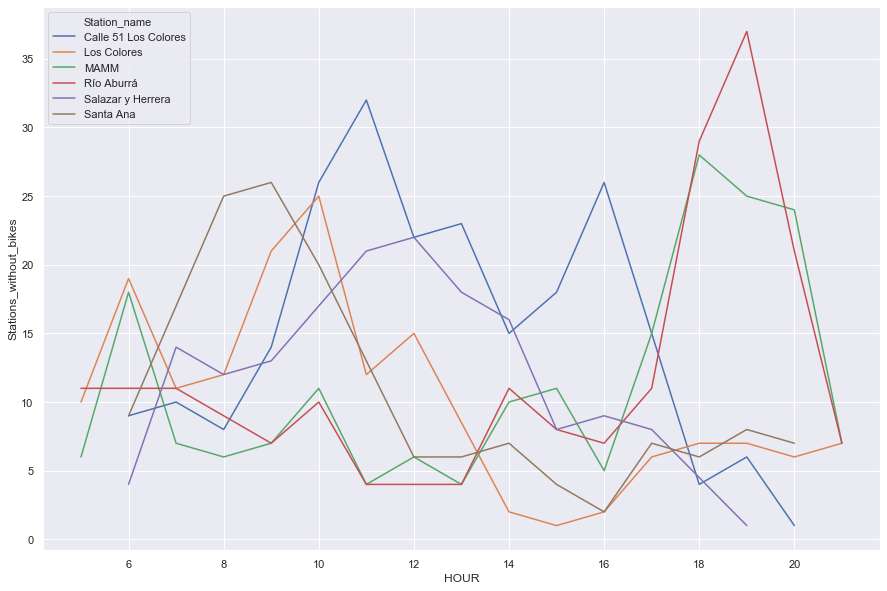

In [9]:
df_temp = df[['HOUR', 'Station_name', 'Station_bikes']][df['Station_bikes'] == 0].groupby(['Station_name', 'HOUR']).size().reset_index()
df_temp.columns = ['Station_name', 'HOUR', 'Stations_without_bikes']

top_stations_df = df_temp[['Station_name','Stations_without_bikes']].groupby('Station_name').sum().sort_values(by='Stations_without_bikes', ascending=False)[:10]
list_top_stations = top_stations_df.reset_index()['Station_name'].tolist()
list_top_stations.remove('UPB')
list_top_stations.remove('Puerta La 77 Sur')
list_top_stations.remove('Primavera')
list_top_stations.remove('Parque 4 Elementos')
#
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.lineplot('HOUR', 'Stations_without_bikes', hue='Station_name', data=df_temp[df_temp['Station_name'].isin(list_top_stations)])
#top_stations_df.reset_index()

In [10]:
df_temp = df[['HOUR', 'Station_name', 'Station_bikes']].copy()
df_temp['Station_bikes_empty'] = df_temp['Station_bikes'].apply(lambda x: 1 if x == 0 else 0)
df_temp['Station_bikes_not_empty'] = df_temp['Station_bikes'].apply(lambda x: 1 if x > 0 else 0)
df_temp2 = df_temp.groupby('Station_name').agg({'Station_bikes_empty':['sum', 'size']}).reset_index()
df_temp2['perc_empty'] = df_temp2['Station_bikes_empty']['sum'] / df_temp2['Station_bikes_empty']['size']
df_temp2[['Station_name', 'perc_empty']][df_temp2['perc_empty'] < 0.99].sort_values(by='perc_empty', ascending=False)[:10]


Station_name perc_empty
                                        
8        Calle 51 Los Colores   0.278589
70                 Río Aburrá   0.245742
33                       MAMM   0.236010
31                Los Colores   0.198297
80                  Santa Ana   0.198297
75          Salazar y Herrera   0.198297
15          Distrito Creativo   0.183698
90              Villa Carlota   0.178832
43                 Otra Banda   0.173966
87  Unidad Deportiva de Belén   0.165450

In [11]:
df_by_station.sort_values(by='avg', ascending=True)[:10]

Station_name  Station_bikes  Station_ID       avg
62             Primavera            0.0         822  0.000000
85                   UPB            0.0         822  0.000000
65      Puerta La 77 Sur            0.0         822  0.000000
46    Parque 4 Elementos            1.0         822  0.001217
75     Salazar y Herrera         2067.0         822  2.514599
8   Calle 51 Los Colores         2170.0         822  2.639903
70            Río Aburrá         3118.0         822  3.793187
66            Punto Cero         3288.0         822  4.000000
36  Metro Envigado Norte         3426.0         822  4.167883
55         Picacha la 76         3472.0         822  4.223844

In [3]:
with open('P:/Mi unidad/Personal/PS_Colombia/202001/DS4A/Project/Encicla/Data/Estaciones_datos_metereologico.csv', encoding='utf-8') as f2:
    weather_df=pd.read_csv(f2, delimiter=';')

In [13]:
weather_df.columns

Index(['Station_id', 'Station_name', 'id', 'name', 'lat', 'lon', 'weather_id',
       'weather_main', 'weather_description', 'main_temp_kelvin',
       'main_feels_like_kelvin', 'main_temp_min_kelvin',
       'main_temp_max_kelvin', 'main_pressure', 'main_humidity', 'visibility',
       'wind_speed', 'wind_deg', 'clouds_all', 'datetime'],
      dtype='object')

In [14]:
wt_stations_df = weather_df[['Station_name', 'weather_main', 'main_temp_kelvin', 'main_feels_like_kelvin', 'datetime']].copy()
#
wt_stations_df['YYYY'] = wt_stations_df['datetime'].str[:4]
wt_stations_df['MM'] = wt_stations_df['datetime'].str[5:7]
wt_stations_df['DD'] = wt_stations_df['datetime'].str[5:7]
wt_stations_df['TIME'] = wt_stations_df['datetime'].str[11:16]
wt_stations_df['datetime'] = pd.to_datetime(wt_stations_df['YYYY'] + '-' + wt_stations_df['MM'] + '-' + wt_stations_df['DD'] + ' ' + wt_stations_df['TIME'], format='%Y-%m-%d %H:%M')
wt_stations_df['hour'] = pd.DatetimeIndex(wt_stations_df['datetime']).hour
#
wt_stations_df['main_temp_celsius'] = wt_stations_df['main_temp_kelvin'] - 273.15
wt_stations_df['main_feels_like_celsius'] = wt_stations_df['main_feels_like_kelvin'] - 273.15

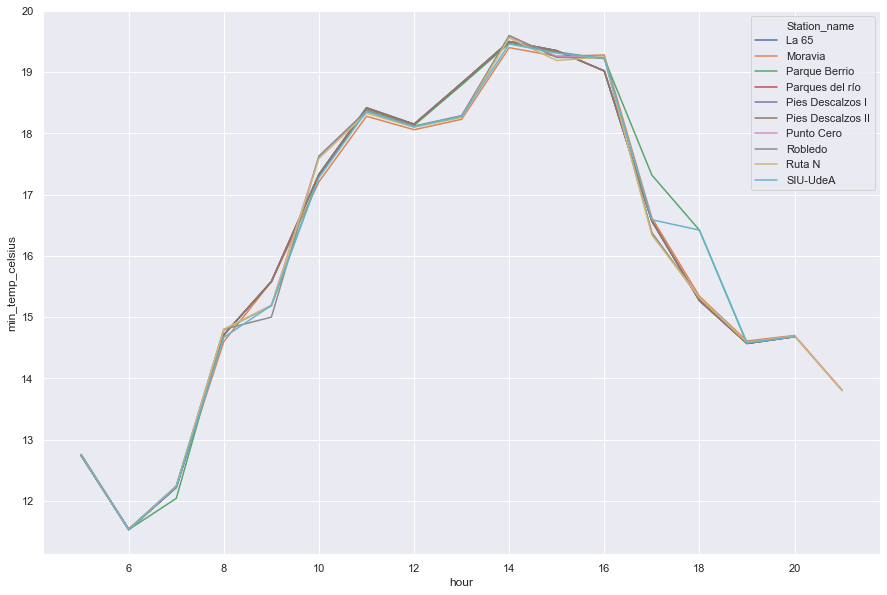

In [15]:
min_temp_by_station_hour_df = wt_stations_df.groupby(['Station_name', 'hour']).agg({'main_temp_celsius':'min'}).reset_index()
min_temp_by_station_hour_df.columns = ['Station_name', 'hour', 'min_temp_celsius']
min_temp_station_top_list = min_temp_by_station_hour_df.groupby('Station_name').min().sort_values(by='min_temp_celsius', ascending=False).reset_index()[:10]['Station_name'].tolist()
#
fig = plt.gcf()
fig.set_size_inches(15, 10)
sns.lineplot('hour', 'min_temp_celsius', hue='Station_name', data=min_temp_by_station_hour_df[min_temp_by_station_hour_df['Station_name'].isin(min_temp_station_top_list)])

Index(['Date', 'Zone_ID', 'Zone_name', 'Zone_desc', 'Station_ID',
       'Station_order', 'Station_name', 'Station_address',
       'Station_description', 'Station_latitude', 'Station_longitude',
       'Station_type', 'Station_capacity', 'Station_bikes', 'Station_places',
       'Station_picture', 'Station_bikes_state', 'Station_places_state',
       'Station_closed', 'Station_cdo', 'YYYY', 'MM', 'DD', 'TIME', 'datetime',
       'HOUR', 'date'],
      dtype='object')


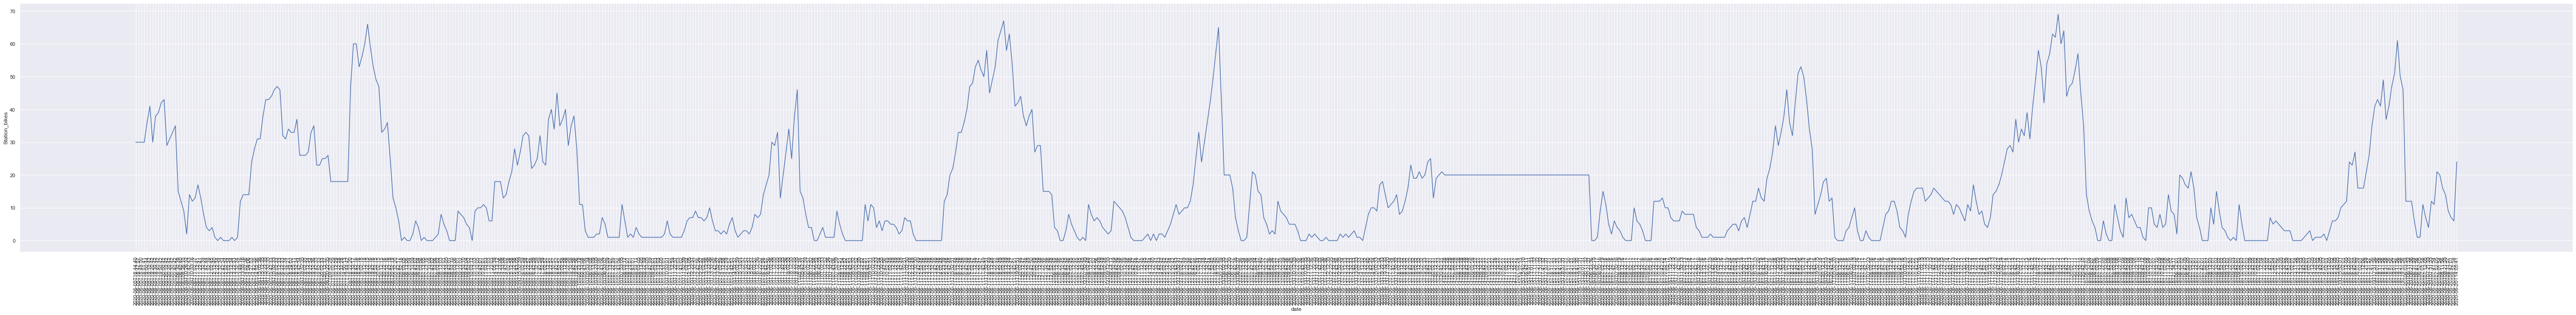

In [44]:
#df = df.rename(columns={"HOUR":"hour"})
#df.dtypes
#wt_stations_df.dtypes
#inventory_df = df[['datetime', 'Station_name', 'Station_bikes','datetime', 'HOUR']].copy()
#inventory_df = inventory_df.rename(columns={'HOUR':'hour'})
#inventory_df
#wt_stations_df[['Station_name', 'weather_main', 'main_temp_celsius', 'datetime', 'hour']]
#inv_wt_df = inventory_df.merge(wt_stations_df[['Station_name', 'weather_main', 'main_temp_celsius', 'datetime', 'hour']], how='inner', on=['datetime', 'Station_name'])
#inv_wt_df
print(df.columns)
#df[df['Station_capacity'] < df['Station_bikes'] + df['Station_places']]
#df[df['Station_places'].isnull()]
#df['date'] = df['datetime'].dt.date
#df[['date', 'Station_bikes']].groupby('date').sum()
df['date'] = df['Date'].str[:19]
#df['date'].unique()
#
fig = plt.gcf()
fig.set_size_inches(100, 10)
lineplot_ind = sns.lineplot('date', 'Station_bikes', data=df[['date', 'Station_bikes']][df['Station_name']=='Moravia'].groupby('date').sum().reset_index())
for item in lineplot_ind.get_xticklabels():
    item.set_rotation(90)
#df[['date', 'Station_bikes']].groupby('date').sum().reset_index()

#

In [15]:
print(weather_df['weather_main'].unique())
weather_df[weather_df['weather_main'].isin(['Thunderstorm'])]

['Clouds' 'Rain' 'Thunderstorm' 'Drizzle' 'Haze' 'Fog']


Station_id          Station_name       id      name   lat    lon  \
9306            1               Moravia  3688889    Berlín  6.28 -75.56   
9307            2           Universidad  3674962  Medellín  6.27 -75.57   
9308            3                Ruta N  3674962  Medellín  6.27 -75.57   
9309            4            Punto Cero  3674962  Medellín  6.27 -75.58   
9310            5  Universidad Nacional  3674962  Medellín  6.26 -75.58   
...           ...                   ...      ...       ...   ...    ...   
20581         126       Sabaneta centro  3670475  Sabaneta  6.15 -75.62   
20582         127            Aves María  3670475  Sabaneta  6.15 -75.62   
20583         128   Biblioteca Sabaneta  3670475  Sabaneta  6.15 -75.62   
20584         129      Puerta La 77 Sur  3670475  Sabaneta  6.15 -75.62   
20585         130    Parque 4 Elementos  3670475  Sabaneta  6.15 -75.61   

       weather_id  weather_main     weather_description  main_temp_kelvin  \
9306          201  Thunderstorm  thunderstorm with rain            287.37   
9307          201  Thunderstorm  thunderstorm with rain            287.36   
9308          201  Thunderstorm  thunderstorm with rain            287.36   
9309          201  Thunderstorm  thunderstorm with rain            287.36   
9310          201  Thunderstorm  thunderstorm with rain            287.36   
...           ...           ...                     ...               ...   
20581         211  Thunderstorm            thunderstorm            288.73   
20582         211  Thunderstorm            thunderstorm            288.73   
20583         211  Thunderstorm            thunderstorm            288.73   
20584         211  Thunderstorm            thunderstorm            288.73   
20585         211  Thunderstorm            thunderstorm            288.72   

       main_feels_like_kelvin  main_temp_min_kelvin  main_temp_max_kelvin  \
9306                   288.01                286.48                288.15   
9307                   288.00                286.48                288.15   
9308                   288.00                286.48                288.15   
9309                   288.00                286.48                288.15   
9310                   288.00                286.48                288.15   
...                       ...                   ...                   ...   
20581                  285.94                287.04                291.15   
20582                  285.94                287.04                291.15   
20583                  285.94                287.04                291.15   
20584                  285.94                287.04                291.15   
20585                  285.93                287.04                291.15   

       main_pressure  main_humidity  visibility  wind_speed  wind_deg  \
9306            1026            100      5000.0         1.0         0   
9307            1026            100      5000.0         1.0         0   
9308            1026            100      5000.0         1.0         0   
9309            1026            100      5000.0         1.0         0   
9310            1026            100      5000.0         1.0         0   
...              ...            ...         ...         ...       ...   
20581           1026             82      8000.0         5.1        90   
20582           1026             82      8000.0         5.1        90   
20583           1026             82      8000.0         5.1        90   
20584           1026             82      8000.0         5.1        90   
20585           1026             82      8000.0         5.1        90   

       clouds_all                                   datetime  
9306           75  2020-06-22T00:20:15-05:00[America/Bogota]  
9307           75  2020-06-22T00:20:16-05:00[America/Bogota]  
9308           75  2020-06-22T00:20:16-05:00[America/Bogota]  
9309           75  2020-06-22T00:20:16-05:00[America/Bogota]  
9310           75  2020-06-22T00:20:16-05:00[America/Bogota]  
.

In [6]:
pandas_profiling.ProfileReport(df)